## Adatok Leírása
A szupermarketek növekedése a legtöbb nagyvárosban egyre nő, és a piaci verseny is erősödik. Az adatkészlet egy szupermarket vállalat történelmi értékesítési adatait tartalmazza, amelyet 3 különböző ágazatban rögzítettek 3 hónapon keresztül. Az adatkészletre könnyen alkalmazhatók a prediktív adatelemzési módszerek.

### Attribútum Információ
- **Invoice id**: Számítógéppel generált értékesítési bizonylat azonosító szám
- **Branch**: Szuperközpont ágazata (3 ágazat áll rendelkezésre, A, B és C-ként azonosítva).
- **City**: A szuperközpontok helyszíne
- **Customer type**: A vásárlók típusa, tagoknak regisztrált vásárlók esetén, akik tagkártyát használnak, és Normál vásárlók, akik nem használnak tagkártyát.
- **Gender**: A vásárló nemének típusa
- **Product line**: Általános termékkategória csoportok - Elektronikai kiegészítők, Divatkiegészítők, Élelmiszerek és italok, Egészség és szépség, Otthon és életmód, Sport és utazás
- **Unit price**: Az egyes termékek ára dollárban
- **Quantity**: A vásárló által vásárolt termékek száma
- **Tax**: 5% adó a vásárló vásárlásáért
- **Total**: Adóval együtt számított teljes ár
- **Date**: A vásárlás dátuma (A feljegyzés 2019 januárjától márciusig áll rendelkezésre)
- **Time**: Vásárlás ideje (10-től 21-ig)
- **Payment**: A vásárló által a vásárláshoz használt fizetési mód (3 módszer áll rendelkezésre – Készpénz, Hitelkártya és E-pénztárca)
- **COGS**: Eladott áruk költsége
- **Gross margin percentage**: Bruttó haszonkulcs százaléka
- **Gross income**: Bruttó jövedelem
- **Rating**: A vásárlók stratifikációs értékelése az általános vásárlási élményről (1-től 10-ig terjedő skálán)


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
file_path = 'supermarket_sales.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()
# data.describe(include='all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [67]:
has_values = data['gross margin percentage'].notnull().any()
print(has_values)

True


In [68]:
branch_city_association = data.groupby(['Branch', 'City']).size().reset_index(name='Count')
print(branch_city_association)

  Branch       City  Count
0      A     Yangon    340
1      B   Mandalay    332
2      C  Naypyitaw    328


In [69]:
daily_totals = data.groupby('Date')['Total'].sum().reset_index().sort_values('Date')
print(daily_totals)

         Date      Total
0    1/1/2019  4745.1810
1   1/10/2019  3560.9490
2   1/11/2019  2114.9625
3   1/12/2019  5184.7635
4   1/13/2019  2451.2040
..        ...        ...
84   3/5/2019  6230.8785
85   3/6/2019  3092.5965
86   3/7/2019  1438.2585
87   3/8/2019  3125.3880
88   3/9/2019  7474.0470

[89 rows x 2 columns]


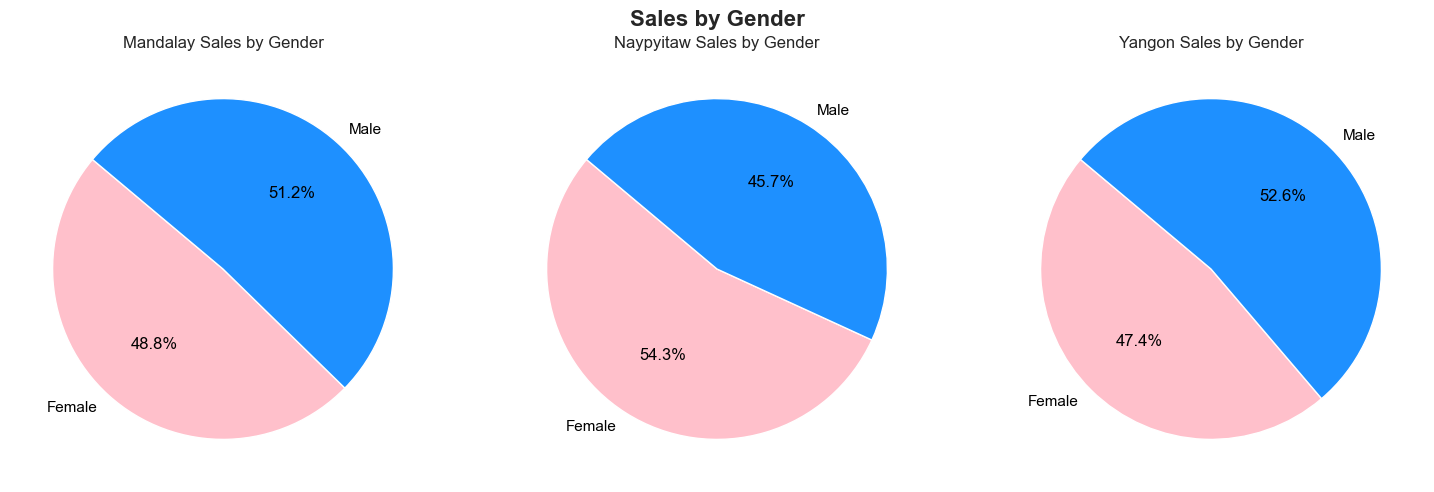

In [70]:
import matplotlib.pyplot as plt

# Group data by City and Gender and count the number of sales
sales_by_gender_city = data.groupby(['City', 'Gender']).size().unstack()

# Define custom colors for the pie chart
colors = ['pink', '#1E90FF']  # Pink for Women, Lighter Dodger Blue for Men

# Create a pie chart for each city
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
cities = sales_by_gender_city.index

for i, city in enumerate(cities):
    sales_by_gender_city.loc[city].plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'color':"black"})
    axes[i].set_ylabel('')
    axes[i].set_title(f'{city} Sales by Gender')

plt.suptitle('Sales by Gender', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


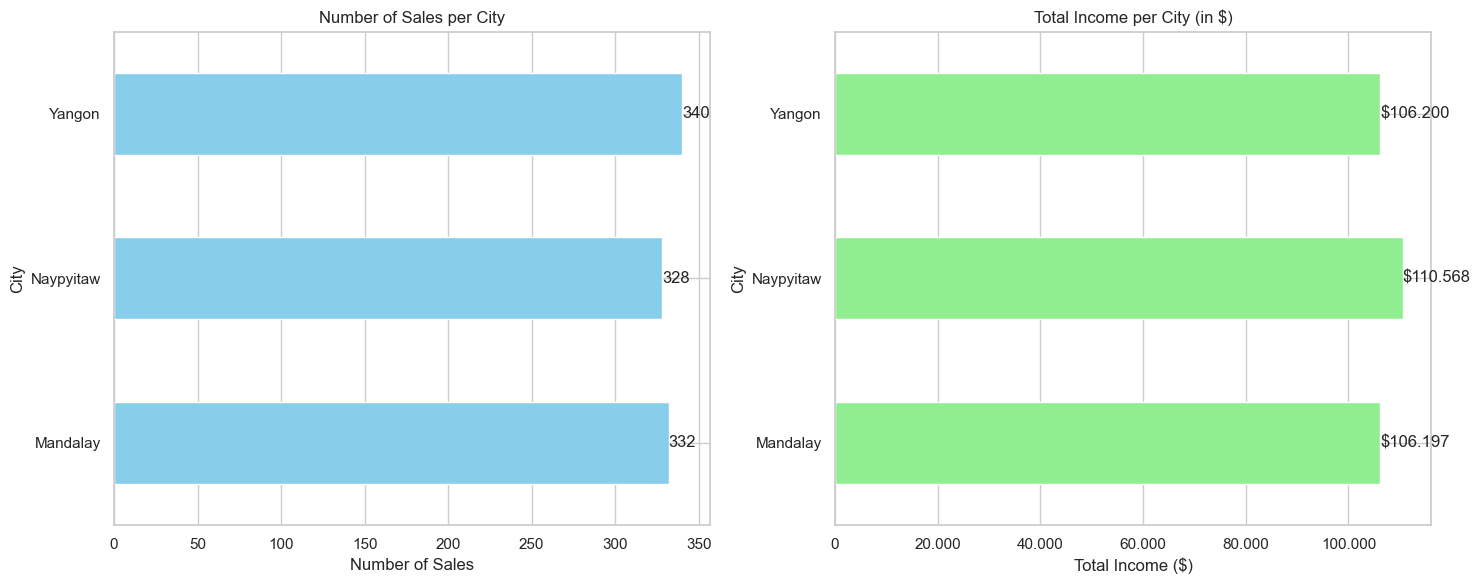

In [71]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Calculate the number of sales per city and sort by city name
sales_per_city = data['City'].value_counts().sort_index()

# Calculate the total income per city and sort by city name
total_income_per_city = data.groupby('City')['Total'].sum().sort_index()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot number of sales per city
bars = sales_per_city.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Number of Sales per City')
axes[0].set_ylabel('City')
axes[0].set_xlabel('Number of Sales')

# Add text labels inside the bars for number of sales
for bar in bars.patches:
    axes[0].text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}',
                 va='center', ha='left')

# Plot total income per city
bars = total_income_per_city.plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('Total Income per City (in $)')
axes[1].set_ylabel('City')
axes[1].set_xlabel('Total Income ($)')

# Format the x-axis on the total income plot to include a dot as a thousands separator
axes[1].get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))

# Add text labels inside the bars for total income
for bar in bars.patches:
    axes[1].text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'${format(int(bar.get_width()), ",").replace(",", ".")}',
                 va='center', ha='left')

# Display the plots
plt.tight_layout()
plt.show()


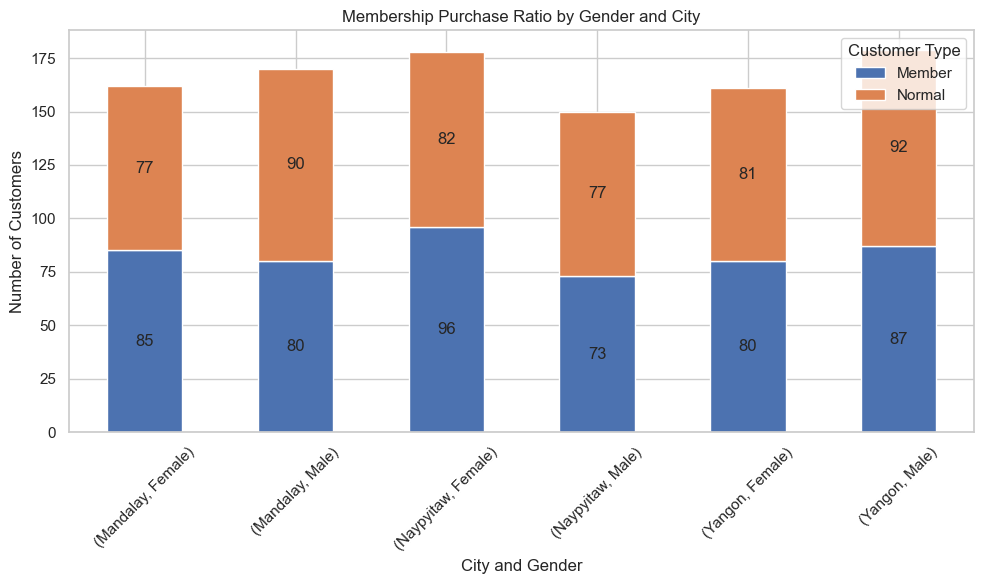

In [72]:
import matplotlib.pyplot as plt

# Filter data for membership status, gender, and city
membership_data = data.groupby(['City', 'Gender', 'Customer type']).size().unstack()

# Create stacked bar chart
ax = membership_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding titles and labels
plt.title('Membership Purchase Ratio by Gender and City')
plt.xlabel('City and Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.legend(title='Customer Type')

# Add value labels to each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # To avoid placing labels on empty segments
        ax.text(x+width/2,
                y+height/2,
                str(int(height)),
                horizontalalignment='center',
                verticalalignment='center')

# Show the plot
plt.tight_layout()
plt.show()


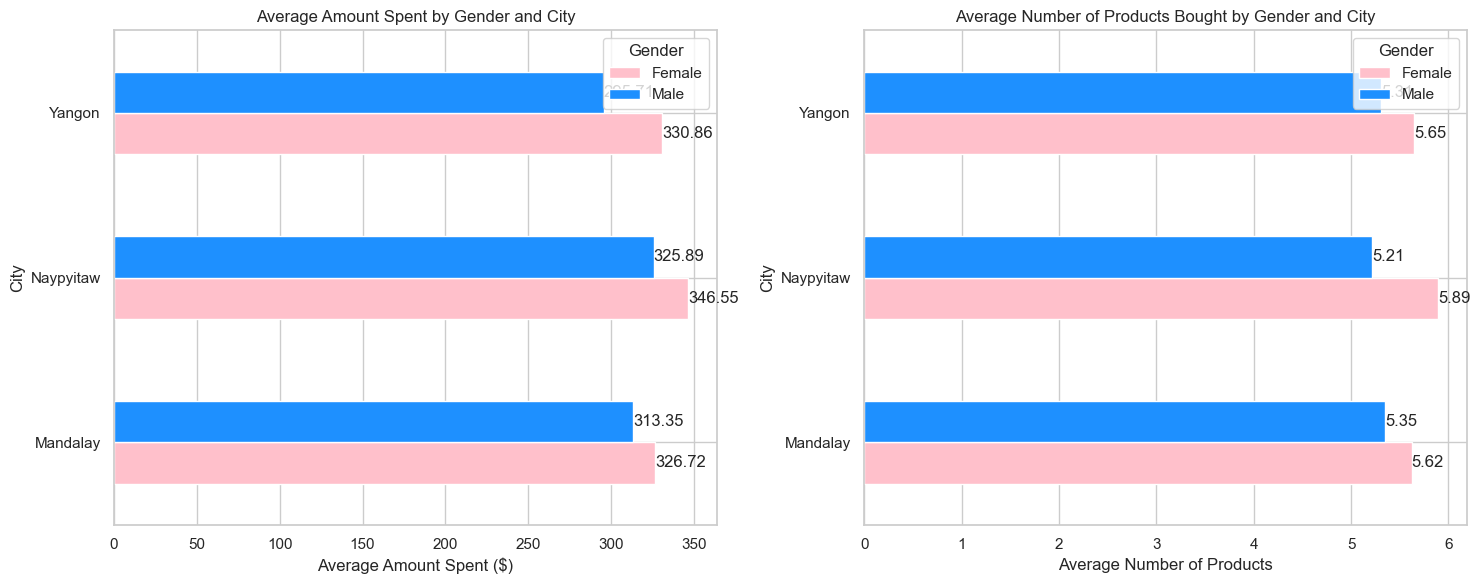

In [73]:
import matplotlib.pyplot as plt

# Calculate average amount spent per gender and city, sorted alphabetically
avg_spent = data.groupby(['City', 'Gender'])['Total'].mean().unstack().sort_index()

# Calculate average number of products bought per gender and city, sorted alphabetically
avg_products = data.groupby(['City', 'Gender'])['Quantity'].mean().unstack().sort_index()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot average amount spent (horizontal bar chart)
spent_bars = avg_spent.plot(kind='barh', ax=axes[0], color=['pink', '#1E90FF'])
axes[0].set_title('Average Amount Spent by Gender and City')
axes[0].set_ylabel('City')
axes[0].set_xlabel('Average Amount Spent ($)')
axes[0].legend(title='Gender')

# Adding text labels to spent_bars
for p in spent_bars.patches:
    axes[0].text(p.get_width(), p.get_y() + p.get_height() / 2., f'{p.get_width():.2f}',
                 ha='left', va='center')

# Plot average number of products bought (horizontal bar chart)
products_bars = avg_products.plot(kind='barh', ax=axes[1], color=['pink', '#1E90FF'])
axes[1].set_title('Average Number of Products Bought by Gender and City')
axes[1].set_ylabel('City')
axes[1].set_xlabel('Average Number of Products')
axes[1].legend(title='Gender')

# Adding text labels to products_bars
for p in products_bars.patches:
    axes[1].text(p.get_width(), p.get_y() + p.get_height() / 2., f'{p.get_width():.2f}',
                 ha='left', va='center')

# Display the plots
plt.tight_layout()
plt.show()


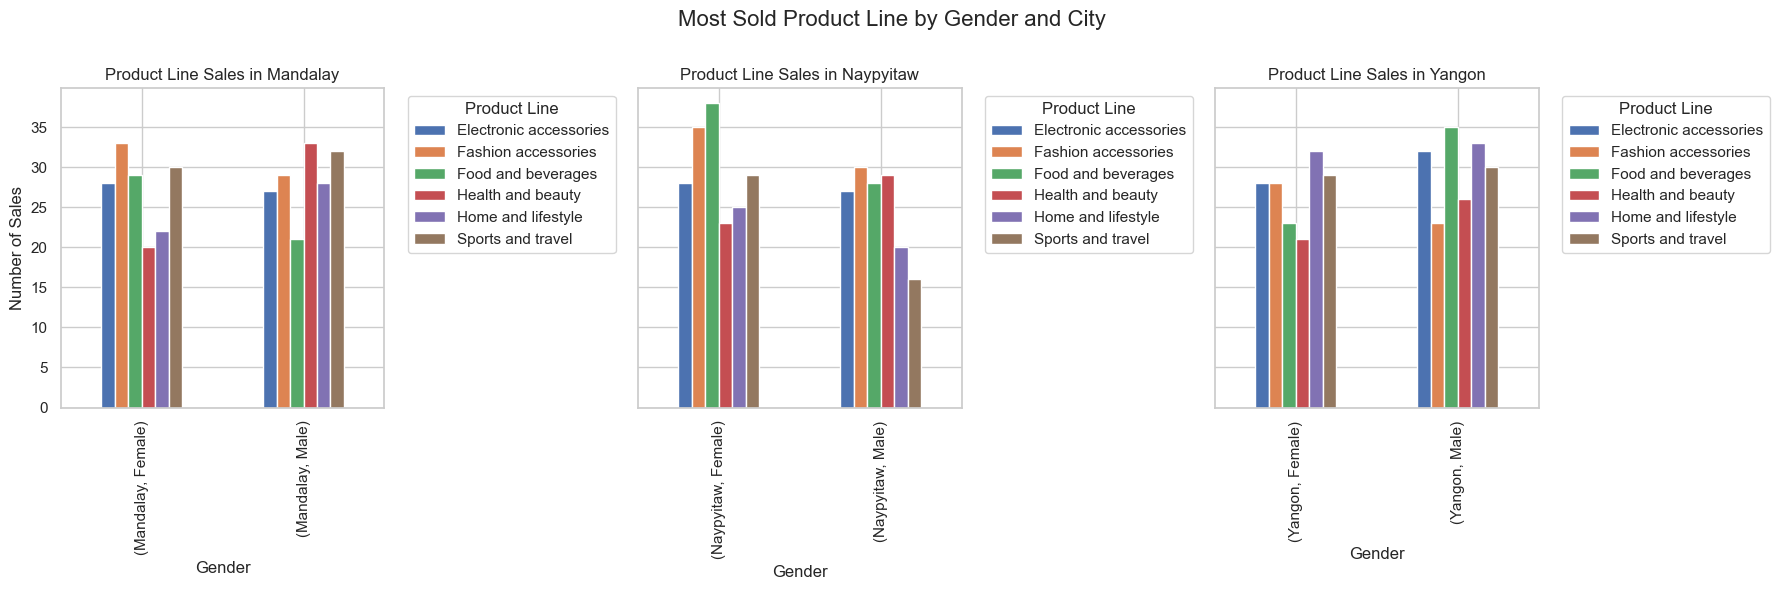

In [74]:
import matplotlib.pyplot as plt

# Group data by city, gender, and product line, and count the number of sales
product_sales = data.groupby(['City', 'Gender', 'Product line']).size().unstack().fillna(0)

# Create subplots for each city and plot product line sales by gender
fig, axes = plt.subplots(nrows=1, ncols=len(product_sales.index.levels[0]), figsize=(18, 6), sharey=True)

for i, (city, data_city) in enumerate(product_sales.groupby(level=0)):
    data_city.plot(kind='bar', ax=axes[i], stacked=False, title=f'Product Line Sales in {city}')

# Set titles and labels
fig.suptitle('Most Sold Product Line by Gender and City', fontsize=16)
for ax in axes:
    ax.set_xlabel('Gender')
    ax.set_ylabel('Number of Sales')
    ax.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top padding for the suptitle

# Show the plot
plt.show()


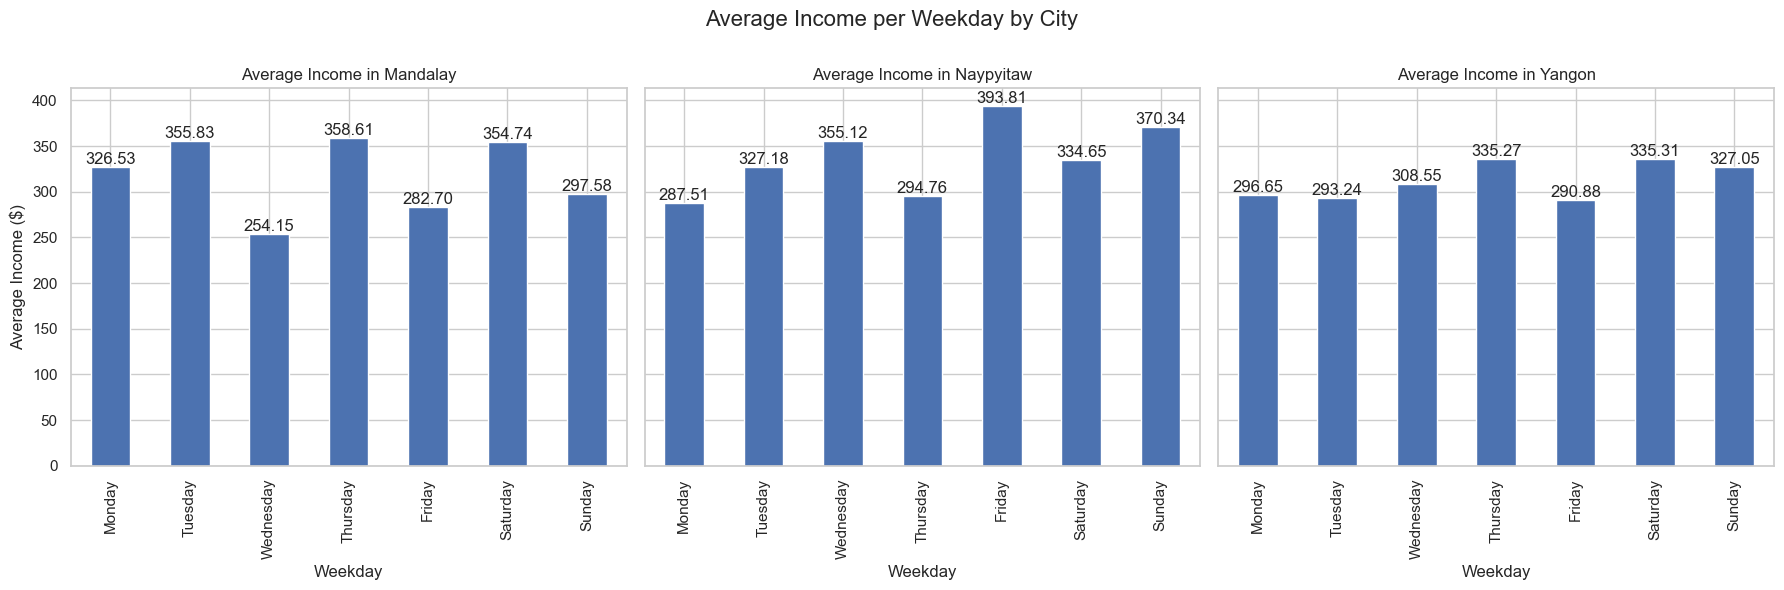

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' to datetime and extract the weekday
data['Date'] = pd.to_datetime(data['Date'])
data['Weekday'] = data['Date'].dt.day_name()

# Calculate the average income per weekday for each city
avg_income_weekday = data.groupby(['City', 'Weekday'])['Total'].mean().unstack()

# Sort the weekdays to display them in order
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_income_weekday = avg_income_weekday[weekdays]

# Create subplots for each city
fig, axes = plt.subplots(nrows=1, ncols=len(avg_income_weekday.index), figsize=(18, 6), sharey=True)

for i, city in enumerate(avg_income_weekday.index):
    bars = avg_income_weekday.loc[city].plot(kind='bar', ax=axes[i], title=f'Average Income in {city}')

    # Add text labels to each bar
    for bar in bars.patches:
        axes[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',
                     ha='center', va='bottom')

# Set titles and labels
fig.suptitle('Average Income per Weekday by City', fontsize=16)
for ax in axes:
    ax.set_xlabel('Weekday')
    ax.set_ylabel('Average Income ($)')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top padding for the suptitle

# Show the plot
plt.show()


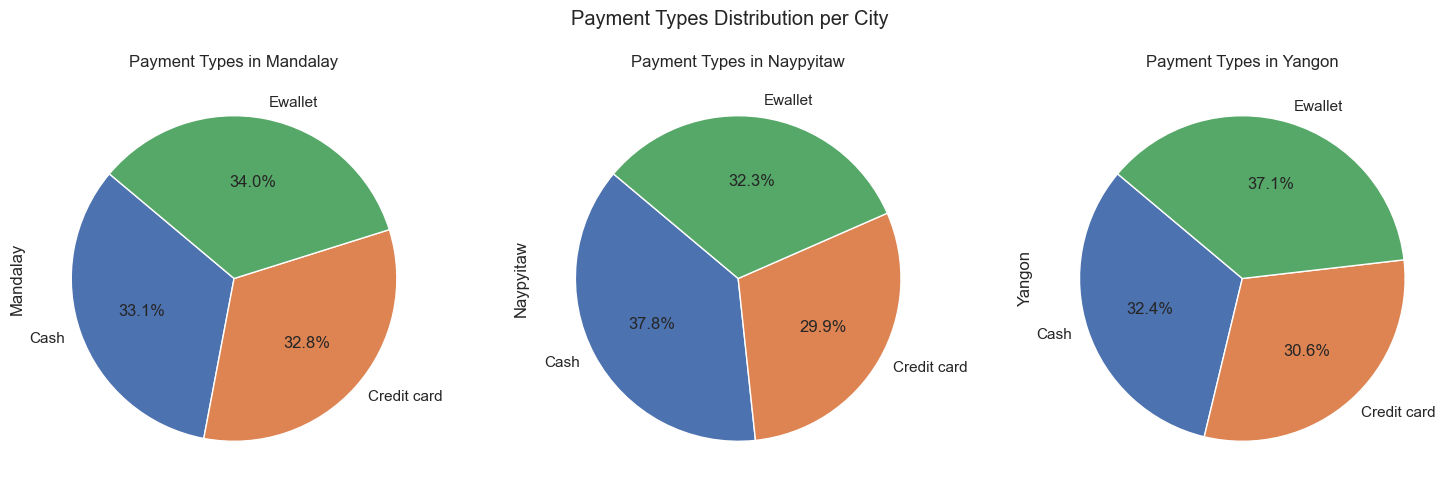

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named 'data'
# If not, you can load it using: data = pd.read_csv('path_to_your_dataset.csv')

# Group data by City and Payment, then count the number of each payment type per city
payment_types = data.groupby(['City', 'Payment']).size().unstack().fillna(0).sort_index()

# Create a pie chart for each city
fig, axes = plt.subplots(1, len(payment_types), figsize=(15, 5))  # Adjust figsize as needed

for i, (city, data_city) in enumerate(payment_types.iterrows()):
    data_city.plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=140, title=f'Payment Types in {city}')

# Adjust the layout and show the plot
plt.suptitle('Payment Types Distribution per City')
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top padding for the suptitle
plt.show()


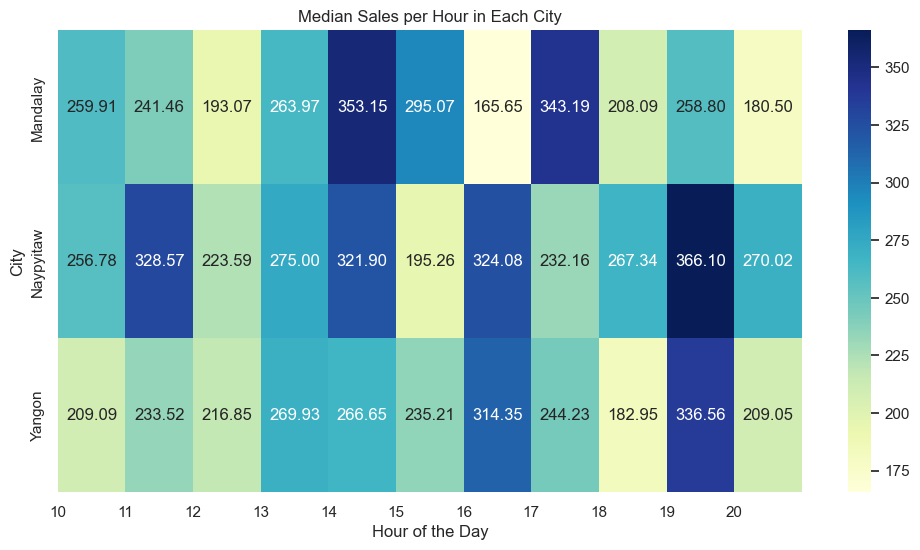

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named 'data'
# If not, you can load it using: data = pd.read_csv('path_to_your_dataset.csv')

# Convert 'Time' to datetime and extract the hour
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

# Calculate the average sales per hour for each city
avg_sales_hour_city = data.groupby(['City', 'Time'])['Total'].median().unstack()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(avg_sales_hour_city, annot=True, cmap='YlGnBu', fmt=".2f")

# Adding titles and labels
plt.title('Median Sales per Hour in Each City')
plt.xlabel('Hour of the Day')
plt.ylabel('City')
plt.xticks(range(len(avg_sales_hour_city.columns)), avg_sales_hour_city.columns)

# Show the plot
plt.show()


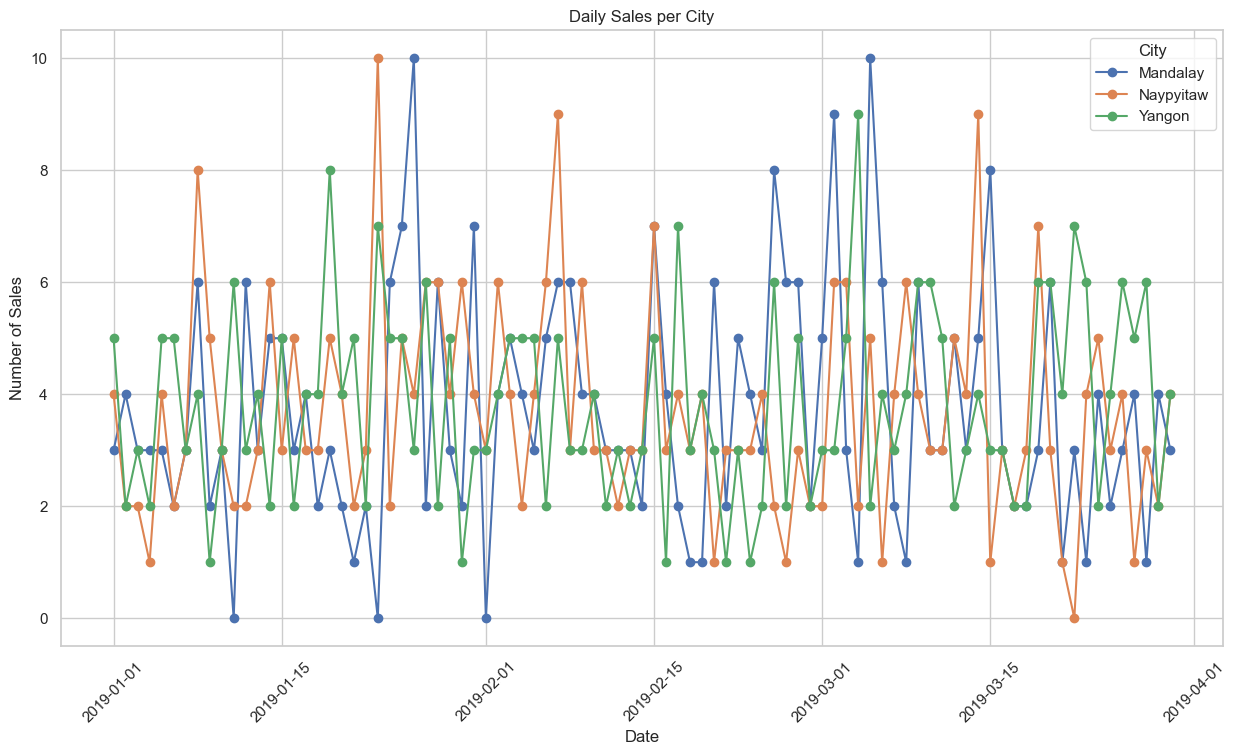

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Assuming you have already loaded the dataset into a DataFrame named 'data'
# If not, you can load it using: data = pd.read_csv('path_to_your_dataset.csv')

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Count daily sales per city
daily_sales = data.groupby(['City', 'Date']).size().reset_index(name='Sales')

# Pivot the data for plotting
pivot_daily_sales = daily_sales.pivot(index='Date', columns='City', values='Sales').fillna(0)

# Create a scatterplot with lines
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
for city in pivot_daily_sales.columns:
    plt.plot(pivot_daily_sales.index, pivot_daily_sales[city], marker='o', label=city)

# Adding titles and labels
plt.title('Daily Sales per City')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend(title='City')

# Show the plot
plt.show()
